Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Özelliklerin Genel Memnuniyet Puanına Katkısı:
SR: 0.01560605279532117
id: 0.02877396588758319
Gender: 0.001624098314392564
Customer_Type: 0.04087608187173261
Age: 0.018258043885880596
Type_of_Travel: 0.14677389894975332
Class: 0.019813918861883245
Flight_Distance: 0.017754738434997495
Inflight_wifi_service: 0.17378233975643156
Departure/Arrival_time_convenient: 0.0047622380403918975
Ease_of_Online_booking: 0.0030417119600091537
Gate_location: 0.015038505517744655
Food_and_drink: 0.0035321549939317447
Online_boarding: 0.3603974645119788
Seat_comfort: 0.012659117618791585
Inflight_entertainment: 0.04785415662307005
On-board_service: 0.006616293638034189
Leg_room_service: 0.00861671567935586
Baggage_handling: 0.014079169516080054
Checkin_service: 0.026714992100141468
Inflight_service: 0.011917907205381944
Cleanliness: 0.00873504016001393
Departure_Delay_in_Minu

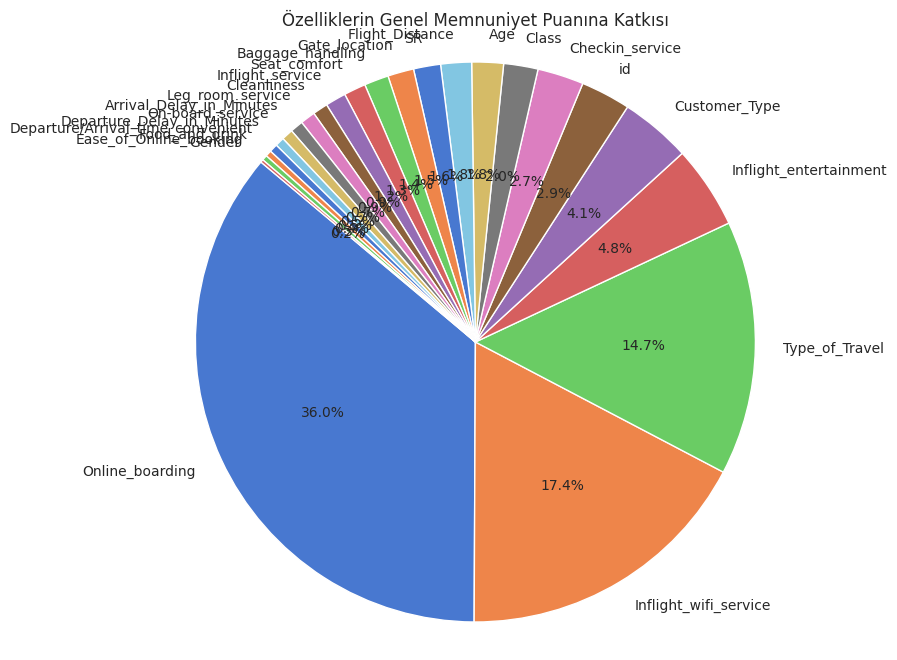

Doğruluk: 94.64%
Bu müşterinin memnuniyet puanı düşük.
T-Statistic: 3.9771676220120176
P-Value: 6.978834181928066e-05
Kadınların sayısı: 52576
Kadınların olumlu oy kullananların sayısı: 22469
Erkeklerin sayısı: 51018
Erkeklerin olumlu oy kullananların sayısı: 22428
Sadıkların olumlu oy kullanma yüzdesi: 43.96095495707397
Sadık olmayanların olumlu oy kullanma yüzdesi: 42.736229458307974
Sadik sayısı: 84662
Sadik olmayan olumlu oy kullananların sayısı: 40413
Sadik olmayan sayısı: 18932
Sadik olmayan olumlu oy kullananların sayısı: 4484
Customer_Type
0    0.477345
1    0.236848
Name: satisfaction, dtype: float64
Sadıkların olumlu oy kullanma yüzdesi: 47.73452080035908
Sadık olmayanların olumlu oy kullanma yüzdesi: 23.684766532854425


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
#preprocessing

# # Veri setini yükleyin
# df = pd.read_excel("airline_clnd.xlsx")

# # "Satisfaction" sütununu güncelle
# df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})

# df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# df["Customer_Type"] = df["Customer_Type"].map({"Loyal Customer": 0, "disloyal Customer": 1})

# df["Type_of_Travel"] = df["Type_of_Travel"].map({"Personal Travel": 0, "Business travel": 1})

# df["Class"] = df["Class"].map({"Eco Plus": 0,"Eco": 0, "Business": 1})


# # Güncellenmiş veriyi dosyaya yaz
# df.to_excel("guncellenmis_airline_clnd.xlsx", index=False)

# df = pd.read_excel("guncellenmis_airline_clnd.xlsx")

#colab
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/drive/MyDrive/Sentiment/guncellenmis_airline_clnd.xlsx')


# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
#ozellik onemi analizi

# Bağımsız değişkenler ve hedef değişkeni ayır
X = df.drop(columns=["satisfaction"])  # Bağımsız değişkenler
y = df["satisfaction"]  # Hedef değişken

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor kullanarak modeli oluştur
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Özelliklerin önem sıralamasını al
feature_importances = model.feature_importances_

# Özelliklerin genel memnuniyet puanına olan katkısını yazdır
print("Özelliklerin Genel Memnuniyet Puanına Katkısı:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")


# Özellik isimlerini ve önem sıralamalarını içeren bir DataFrame oluştur
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Görselleştirme için seaborn stilini ayarla
sns.set_style("whitegrid")

# Pasta grafiği oluştur
plt.figure(figsize=(10, 8))
plt.pie(feature_importance_df["Importance"], labels=feature_importance_df["Feature"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.axis('equal')  # Daireyi daire olarak ayarla
plt.title('Özelliklerin Genel Memnuniyet Puanına Katkısı')
plt.show()



# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# # model egitimi


X = df[['Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
          'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
          'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling',
          'Checkin_service', 'Inflight_service', 'Cleanliness']]
y = df['satisfaction']

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier kullanarak modeli eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Modeli test et
y_pred = model.predict(X_test)

# Doğruluk skorunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk: {:.2f}%".format(accuracy * 100))



# Örnek bir girdi oluştur
sample_input = {
    'Inflight_wifi_service': 1,
    'Departure/Arrival_time_convenient': 1,
    'Ease_of_Online_booking': 1,
    'Gate_location': 2,
    'Food_and_drink': 1,
    'Online_boarding': 1,
    'Seat_comfort': 1,
    'Inflight_entertainment': 2,
    'On-board_service': 2,
    'Leg_room_service': 2,
    'Baggage_handling': 2,
    'Checkin_service': 1,
    'Inflight_service': 2,
    'Cleanliness': 3
}

# Örneği DataFrame formatına dönüştür
sample_input_df = pd.DataFrame(sample_input, index=[0])

# Modeli kullanarak memnuniyet puanını tahmin et
satisfaction_prediction = model.predict(sample_input_df)

# Sonucu yazdır
if satisfaction_prediction[0] == 0:
    print("Bu müşterinin memnuniyet puanı düşük.")
else:
    print("Bu müşterinin memnuniyet puanı yüksek.")



# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# kadın- erkek analiz


from scipy.stats import ttest_ind

# Cinsiyetlere göre memnuniyeti ayır
male_satisfaction = df[df['Gender'] == 0]['satisfaction']
female_satisfaction = df[df['Gender'] == 1]['satisfaction']

# T-testi yap
t_statistic, p_value = ttest_ind(male_satisfaction, female_satisfaction)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Kadınların ve erkeklerin sayısı
female_count = df[df['Gender'] == 1].shape[0]
male_count = df[df['Gender'] == 0].shape[0]

# Kadınların olumlu oy kullananların sayısı
female_positive_count = df[(df['Gender'] == 1) & (df['satisfaction'] == 1)].shape[0]
male_positive_count = df[(df['Gender'] == 0) & (df['satisfaction'] == 1)].shape[0]

print("Kadınların sayısı:", female_count)
print("Kadınların olumlu oy kullananların sayısı:", female_positive_count)

print("Erkeklerin sayısı:", male_count)
print("Erkeklerin olumlu oy kullananların sayısı:", male_positive_count)

# erkek yüzde kaçı olumlu oy kullanmış
male_positive_percentage = (male_positive_count / male_count) * 100
print("Sadıkların olumlu oy kullanma yüzdesi:", male_positive_percentage)

# kadin olmayanların yüzde kaçı olumlu oy kullanmış
female_positive_percentage = (female_positive_count / female_count) * 100
print("Sadık olmayanların olumlu oy kullanma yüzdesi:", female_positive_percentage)



# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# # sadık ve sadık olmayan sayısı


loyale = df[df['Customer_Type'] == 0].shape[0]
disloyale = df[df['Customer_Type'] == 1].shape[0]

# Kadınların olumlu oy kullananların sayısı
disloyale_count = df[(df['Customer_Type'] == 1) & (df['satisfaction'] == 1)].shape[0]
loyale_count = df[(df['Customer_Type'] == 0) & (df['satisfaction'] == 1)].shape[0]

print("Sadik sayısı:", loyale)
print("Sadik olmayan olumlu oy kullananların sayısı:", loyale_count)

print("Sadik olmayan sayısı:", disloyale)
print("Sadik olmayan olumlu oy kullananların sayısı:", disloyale_count)


# Customer_Tyoe'a göre grupla ve ortalama memnuniyet düzeylerini hesapla
customer_type_satisfaction = df.groupby("Customer_Type")["satisfaction"].mean()

# Sonuçları yazdır
print(customer_type_satisfaction)

# Sadıkların yüzde kaçı olumlu oy kullanmış
loyal_positive_percentage = (loyale_count / loyale) * 100
print("Sadıkların olumlu oy kullanma yüzdesi:", loyal_positive_percentage)

# Sadık olmayanların yüzde kaçı olumlu oy kullanmış
disloyal_positive_percentage = (disloyale_count / disloyale) * 100
print("Sadık olmayanların olumlu oy kullanma yüzdesi:", disloyal_positive_percentage)

# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
